In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

## Loading dataset

In [2]:
PATH = "dataset.csv"
data = pd.read_csv(PATH)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
my_dict = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica' : 2
}

In [6]:
data['species'] = data['species'].replace(my_dict)

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_11480\3309086252.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['species'] = data['species'].replace(my_dict)


In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Visualization using Seaborn

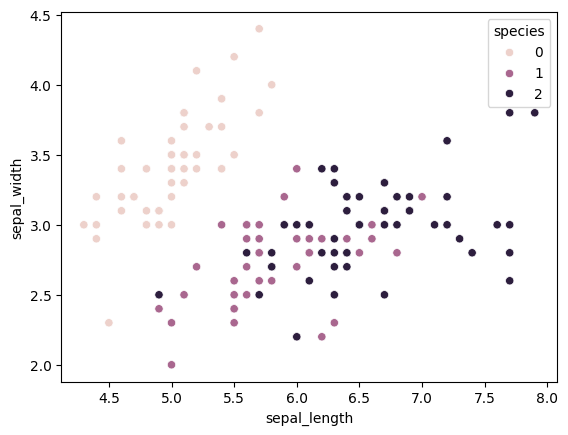

In [8]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=data)
plt.show()

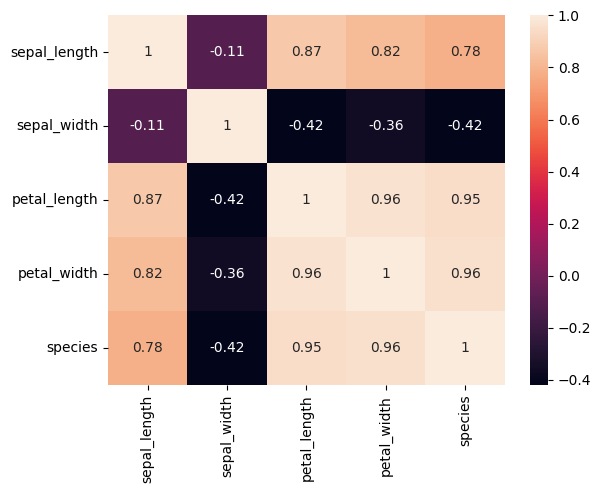

In [9]:
sns.heatmap(data.corr(), annot=True)
plt.show()

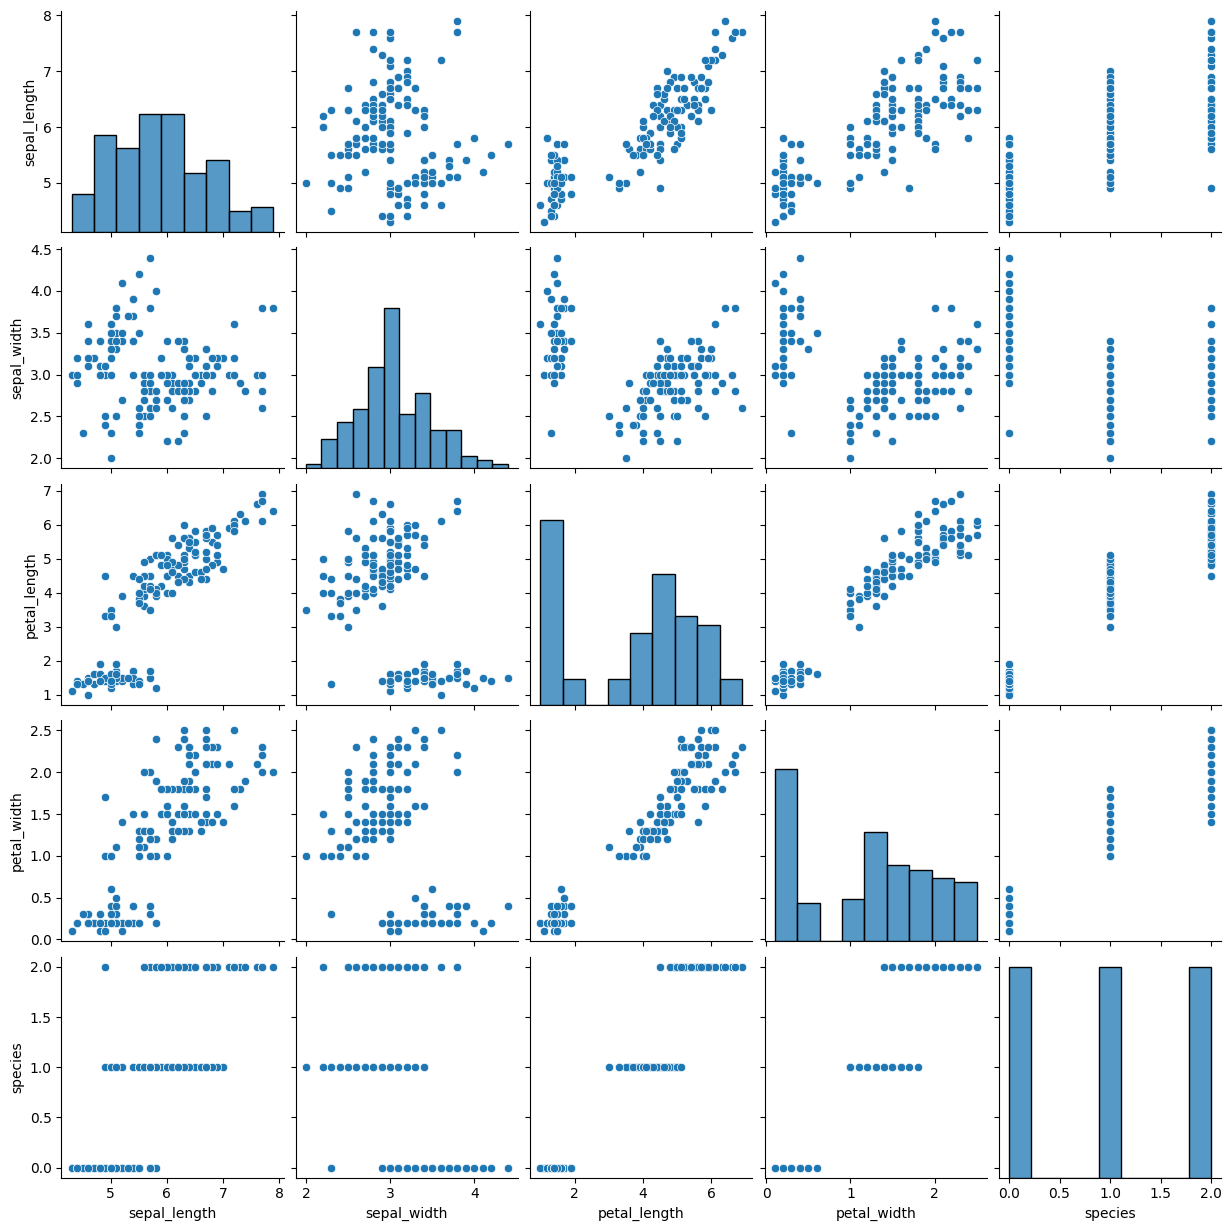

In [10]:
sns.pairplot(data)
plt.show()

## Predictions using KNN

In [11]:
X, Y = np.array(data.drop(columns = 'species')), np.array(data['species'])
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [12]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)
print(f"Accuracy: {(y_preds == y_test).sum() / len(y_preds) * 100}")

Accuracy: 98.0
